# Tutorial of pymoog

This is a short tutorial on how to run pymoog and extract synthetic spectra.

Warning: the built-in line list now only contain H, He, ..., Ca and Fe lines covering from 3800 to 7400 AA. 


In [1]:
import pymoog
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Initilize a Instance for synth 
synth_spec = pymoog.synth.synth(5750, 4.0, 0, 4020, 4080, 2500000)

# Prepare the files for MOOG; if custom model and/or line list is ready, it can be specified using "model_file" and "line_list".
synth_spec.prepare_file()

# Run MOOG (output can be close be detelting `output=True`)
synth_spec.run_moog(output=True)

# Extract the synthetic spectra
synth_spec.read_spectra()

 *******************************************************************************
                          MOOG LTE VERSION (NOV 2019)                           
MOOG PARAMETERS; here is the filename: batch.par                                
                       MOOG IS CONTROLLED BY DRIVER synth  
 *******************************************************************************
STANDARD OUTPUT; here is the filename: MOOG.out1                                
RAW SYNTHESIS OUTPUT; here is the filename: MOOG.out2                           
SMOOTHED SYNTHESES OUTPUT; here is the filename: MOOG.out3                      
THE MODEL ATMOSPHERE; here is the filename: model.mod                           
THE LINE LIST; here is the filename: line.list                                  
                                                                                
 <<<<<<<<<<<<<<<<<<<<<<          MOOG HAS ENDED!          >>>>>>>>>>>>>>>>>>>>>>


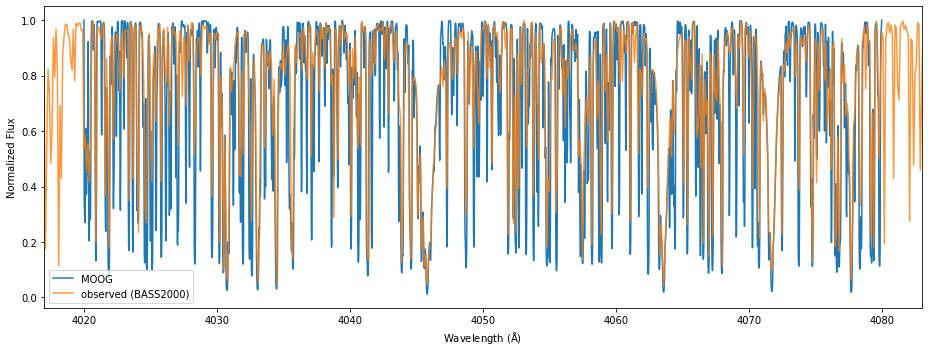

In [4]:
# Plot the synthetic spectra
plt.figure(figsize=(13,5))
plt.plot(synth_spec.wav, synth_spec.flux, label='MOOG')
plt.xlim(plt.xlim());

# Read the observed solar spectra as comparison
solar_spec_observe = pd.read_csv('solar_spec.txt', sep=' +', names=['wav', 'flux'], engine='python')
plt.plot(solar_spec_observe['wav'], solar_spec_observe['flux']/10000+0.01, alpha=0.8, label='observed (BASS2000)')

plt.legend()
plt.xlabel('Wavelength ($\mathrm{\AA}$)');
plt.ylabel('Normalized Flux');
plt.tight_layout()

## Derive the spectral respone on stellar parameters

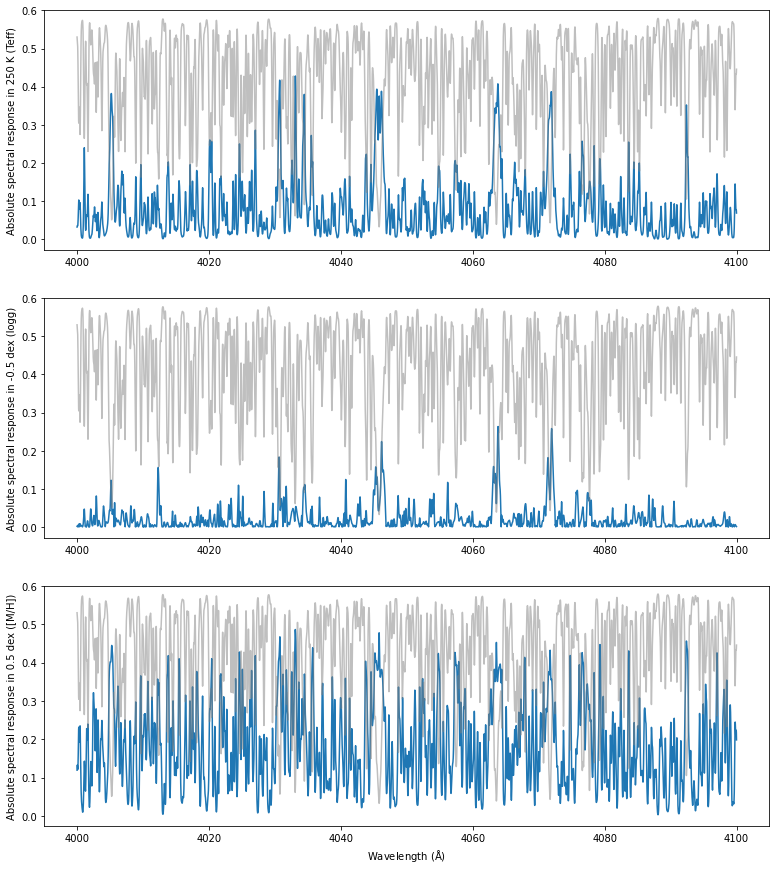

In [5]:
# Geerate the standard synthetic spectra
synth_spec = pymoog.synth.synth(5750, 4.0, 0, 4000, 4100, 25000)
synth_spec.prepare_file()
synth_spec.run_moog()
synth_spec.read_spectra()

plt.figure(figsize=(13,15))
ylabel_dict = {1:'250 K (Teff)', 2:'-0.5 dex (logg)', 3:'0.5 dex ([M/H])'}
i = 1

# Shift the stellar parameter (Teff, logg and [M/H]) and plot the spectral response abs(flux - flux_shifted) / flux.
for paras in [[6000, 4.0, 0], [5750, 3.5, 0], [5750, 4.0, 0.5]]:
    plt.subplot(3,1,i)
    synth_spec_del = pymoog.synth.synth(*paras, 4000, 4100, 25000)
    synth_spec_del.prepare_file()
    synth_spec_del.run_moog()
    synth_spec_del.read_spectra()

    del_flux = np.abs(synth_spec_del.flux - synth_spec.flux) / synth_spec.flux
    plt.plot(synth_spec.wav, del_flux)
    plt.plot(synth_spec.wav, synth_spec.flux * 0.58, color='gray', alpha=0.5)
    plt.ylabel('Absolute spectral response in {}'.format(ylabel_dict[i]));
    plt.ylim(top=0.6)
    i += 1

plt.xlabel('Wavelength ($\mathrm{\AA}$)');
